## _Medical Insurance Costs_

Pada kasus ini, terdapat data tentang informasi kesehatan dan biaya yang harus dikeluarkan oleh asuransi kesehatan. Infomasi terkait dengan data _medical insurance cost_ adalah sebagai berikut,

1. Age: Usia penerima manfaat
2. Sex: Gender penerima manfaat (_male_, _femele_)
3. Bmi : Body Mass Index
4. Children: Jumlah anak/tanggungan yang dicover oleh pihak asuransi
5. Smoker: Status perokok (_yes_, _no_)
6. Region: Wilayah tempat tinggal penerima manfaat
7. Charges: Biaya yang dikeluarkan oleh asuransi

In [351]:
# Selayang pandang data Medical Insurance Costs
import pandas as pd

df = pd.read_csv('data/insurance.csv')

display(df.head())

# Pandas dataframe.corr() digunakan untuk menemukan korelasi berpasangan dari semua kolom
# dalam Pandas Dataframe dengan Python. Nilai NaN apa pun secara otomatis dikecualikan. 
# Setiap tipe data atau kolom non-numerik dalam Dataframe, diabaikan.
display(df.corr())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [352]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [353]:
#cek variasi data
print(df['region'].value_counts())
print('\n')
print(df['smoker'].value_counts())
print('\n')
print(df['sex'].value_counts())
print('\n')

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


male      676
female    662
Name: sex, dtype: int64




In [354]:
raihangantengregion = {
    'southeast' : 0,
    'southwest' : 1,
    'northwest' : 2,
    'northeast' : 3
}

raihangantengsmoker = {
    'no' : 0,
    'yes' : 1
}

raihangantengsex = {
    'male' : 0,
    'female' : 1
}

df['region'] = df['region'].map(raihangantengregion)
df['sex'] = df['sex'].map(raihangantengsex)
df['smoker'] = df['smoker'].map(raihangantengsmoker)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [355]:
# the independent variables set
R = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = R.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(R.values, i)
                          for i in range(len(R.columns))]
  
print(vif_data)

    feature       VIF
0       age  7.961618
1       sex  1.922559
2       bmi  8.713423
3  children  1.803851
4    smoker  1.250849
5    region  2.371365


In [356]:
df_drop = df.copy()
df_drop = df_drop.drop(df.columns[0], axis = 1)
df_drop = df_drop.drop(df.columns[2], axis = 1)

df_drop.head()

,sex,children,smoker,region,charges
0,1,0,1,1,16884.92400
1,0,1,0,0,1725.55230
2,0,3,0,0,4449.46200
3,0,0,0,2,21984.47061
4,0,0,0,2,3866.85520


In [357]:
x = df_drop.iloc[:,:-1].values
y = df_drop.iloc[:,4].values

y = y.reshape(len(y), 1)

xm_train, xm_test, ym_train, ym_test = train_test_split(x,y, test_size= 0.2, random_state=100)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

y.shape

(1338, 1)

In [358]:
lr = LinearRegression()
lr.fit(xm_train, ym_train)

ym_pred = lr.predict(xm_test)

gabungraihan = np.concatenate((ym_test, ym_pred))
gabungraihan


r2_value = r2_score(ym_test, ym_pred)
print(f'Hasil dari R2 : {r2_value}')

Hasil dari R2 : 0.6838407080320639


Jawaban R2 = 1.0

In [359]:
x = df_drop.iloc[:,-1].values
y = df_drop.iloc[:,4].values

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

xm_train, xm_test, ym_train, ym_test = train_test_split(x,y, test_size= 0.2, random_state=100)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

y.shape

(1338, 1)

In [360]:
lr = LinearRegression()
lr.fit(xm_train, ym_train)

ym_pred = lr.predict(xm_test)

gabungraihan = np.concatenate((ym_test, ym_pred))
gabungraihan

r2_lr = r2_score(ym_test,ym_pred)
print(r2_lr)

1.0


In [361]:
print(ym_pred)
print(ym_test)

[[ 1826.843   ]
 [20177.67113 ]
 [ 7421.19455 ]
 [ 1877.9294  ]
 [15518.18025 ]
 [29523.1656  ]
 [13143.86485 ]
 [ 3279.86855 ]
 [18972.495   ]
 [12950.0712  ]
 [ 8083.9198  ]
 [18218.16139 ]
 [ 8334.45755 ]
 [ 2727.3951  ]
 [ 7441.053   ]
 [38711.      ]
 [10338.9316  ]
 [11552.904   ]
 [ 4751.07    ]
 [11381.3254  ]
 [10226.2842  ]
 [ 1526.312   ]
 [ 7222.78625 ]
 [21259.37795 ]
 [10848.1343  ]
 [58571.07448 ]
 [ 3268.84665 ]
 [48517.56315 ]
 [21880.82    ]
 [13457.9608  ]
 [12592.5345  ]
 [ 2457.21115 ]
 [47896.79135 ]
 [33732.6867  ]
 [ 6600.361   ]
 [14349.8544  ]
 [18963.17192 ]
 [39047.285   ]
 [ 3645.0894  ]
 [30942.1918  ]
 [ 7624.63    ]
 [ 7650.77375 ]
 [ 2498.4144  ]
 [ 4949.7587  ]
 [ 2196.4732  ]
 [ 3972.9247  ]
 [ 4415.1588  ]
 [ 2362.22905 ]
 [11272.33139 ]
 [ 5662.225   ]
 [13405.3903  ]
 [ 8269.044   ]
 [ 4915.05985 ]
 [ 7729.64575 ]
 [ 7045.499   ]
 [11674.13    ]
 [10085.846   ]
 [37607.5277  ]
 [ 6313.759   ]
 [20781.48892 ]
 [24059.68019 ]
 [ 2741.948   ]
 [18157.

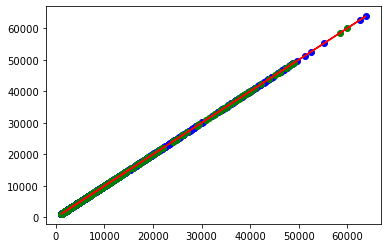

In [362]:
import matplotlib.pyplot as plt

plt.scatter(xm_train, ym_train, color='blue')
plt.plot(xm_train, lr.predict(xm_train), color='red')
plt.scatter(xm_test, ym_pred, color = 'green')
plt.show()

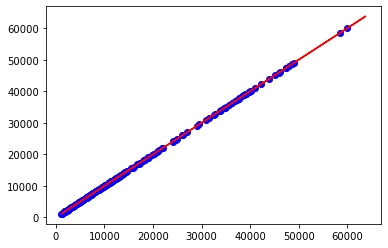

In [363]:
# Visualisasi data Testing
plt.scatter(xm_test, ym_test, color='blue')
plt.plot(xm_train, lr.predict(xm_train), color='red') # Regresion Line
# plt.scatter(x_test, y_pred, color = 'green')
plt.show()

In [364]:
# https://scikit-learn.org/0.21/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2_value = r2_score(ym_test, ym_pred)
print(f'Hasil dari R2 : {r2_value}')

Hasil dari R2 : 1.0


### Tantangan

Buatlah model regresi untuk memprediksi biaya yang harus dikeluarkan oleh pihak asuransi berdasarkan data. Validasi performa model regresi Anda dengan nilai ***R-squared ($R^2$)***

#### _Tasks_

1. Pastikan semua variabel kategorial diolah dengan baik. (Gunakan fitur mapping pada pandas)
2. Cek kondisi multicollinearity untuk semua variabel independen. Jika ada, antar variabel apakah itu?
3. Pastikan model menggunakan variabel yang tidak memiliki nilai multicollinearity yang tinggi
4. (Hints) Anda dapat menggunakan nilai ***Variance Inflation Factor (VIF)*** untuk mengetahui tingkat multicollinearity pada sebuah variabel independent.
5. Evaluasi model yang Anda buat dengan nilai $R^2$
6. Simpulkan, variabel independen apa saja yang dapat digunakan untuk menghasilkan model regresi yang baik pada kasus _medical insurance costs_?

#### (Hints) Interpretasi Nilai VIF

- 1 - variabel indenpenden tidak memiliki korelasi dengan variabel independen yang lain
- 1 < VIF < 5 - variabel independen sedikit memiliki korelasi dengan variabel independen yang lain
- VIF > 5 - variabel independen memiliki korelasi yang kuat dengan variabel independen lainnya
- VIF > 10 - variabel independen miliki korelasi yang sangat kuat dengan variabel independen dan perlu diperhatikan lebih lanjut

#### (Hints) Implementasi Perhitungan VIF

VIF dapat dihitung secara langsung dengan menggunakan library dari `statsmodels`

#### (Hints) Scatterplot Korelasi Antar Variabel

![var_cor](assets/var_corr.png)